# Содержание проекта

[Введение](#link0)

[Импорт данных](#link1)

[Предобработка данных](#link2)

[Описание распределений](#link3)

[Проверка гипотез](#link4)

[Вывод](#link5)

## <a id="link0">Введение </a>

Целью данной работы является сравнение двух тарифов мобильного оператора. Необходимо описать распределения по израсходованным минутам, мегабайтам и сообщениям в месяц для каждого из тарифов, а так же проверить ряд статистических гипотез.

## <a id="link1"> Импорт данных </a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as st

Поочередно запишем исходные данные из файлов в датафреймы и изучим общую информацию:

In [2]:
calls = pd.read_csv('/datasets/calls.csv')

display(calls.info())

display(calls.head())

display(calls.describe())

print('Количество звонков с нулевой продолжительностью', calls.query('duration == 0').shape[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


Количество звонков с нулевой продолжительностью 39613


В таблице calls обнаружено внушительное количество стоблцов с нулевой продолжительностью вызова. Столбец с датой вызова было бы хорошо привести к формату datetime, чтобы иметь возможность дальше с ним работать.

In [3]:
internet = pd.read_csv('/datasets/internet.csv')

display(internet.info())

display(internet.head())

display(internet.describe())

print('Количество сессий с нулевым трафиком', internet.query('mb_used == 0').shape[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


Количество сессий с нулевым трафиком 19598


Около 15% сессий от общего количества имеют нулевое значение трафика. Столбец с датами сессий так же требует приведения к формату datetime.

In [4]:
messages = pd.read_csv('/datasets/messages.csv')

display(messages.info())

messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [5]:
tariffs = pd.read_csv('/datasets/tariffs.csv')

display(tariffs.info())

tariffs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [6]:
users = pd.read_csv('/datasets/users.csv')

display(users.info())

display(users.head())

display(users.groupby('tariff').describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


user_id                                                           \
         count         mean         std     min     25%     50%     75%   
tariff                                                                    
smart    351.0  1244.133903  144.985228  1001.0  1120.0  1236.0  1371.5   
ultra    149.0  1262.140940  142.976516  1000.0  1143.0  1276.0  1379.0   

                  age                                                      
           max  count       mean        std   min   25%   50%   75%   max  
tariff                                                                     
smart   1499.0  351.0  46.455840  16.580287  18.0  32.0  47.0  62.0  75.0  
ultra   1495.0  149.0  46.899329  16.923814  18.0  31.0  46.0  63.0  75.0

Значения столбца churn_date пропущены для пользователей, которые пользуюся тарифом на настоящий момент. Так же стоит отметить, что большинство пользователей выбирает тариф smart, распределение пользователей тарифов по возрастным группам одинаковое.

# <a id="link2"> Предобработка данных </a>

Первым делом приведем все столбцы с датами к формату datetime, чтобы дальше можно было эффективно с ними работать, используя все преимущества методов .dt

In [7]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d', errors = 'ignore')

internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d', errors = 'ignore')

messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d', errors = 'ignore')

users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d', errors = 'ignore')

Определим функцию для обработки пропущенных значений в столбце с датами прекращения пользования тарифом, пусть пропущенные заменяются нулем, а те, что содержат даты - преобразовываются к необходимому формату:

In [8]:
def nan_to_null(row):
    
    if pd.isna(row['churn_date']):
        
        return 0
    
    else:
        
        return pd.to_datetime(row['churn_date'], format = '%Y-%m-%d', errors = 'ignore')
    
users['churn_date'] = users.apply(nan_to_null, axis = 1)

users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,0,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,0,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,0,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,0,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,0,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,0,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,0,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25 00:00:00,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


Согласно описанию тарифов, оператор округляет "вверх" значения продолжительности звонков и количества трафика, выполним данные преобразования для соответствующих наборов данных и приведем величины к целочисленному типу. После этого считаю разумным избавиться от сессий с нулевым трафиком и звонков с нулевой продолжительностью. Замена этих данных медианой может сильно исказить исходные данные и сместить распределения величин, а так же ряд статистичесих характеристик. 

In [9]:
calls['duration'] = calls['duration'].apply(np.ceil).astype('int64')

calls = calls.query('duration != 0')

internet['mb_used'] = internet['mb_used'].apply(np.ceil).astype('int64')

internet = internet.query('mb_used != 0')

Объединим таблицы с информацией о пользователях и тарифах, так чтобы для каждого пользователя отображались величины, включенные в его тариф.

In [10]:
users_with_tariffs = users.merge(tariffs, left_on = 'tariff', right_on = 'tariff_name', how = 'left')

users_with_tariffs

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
1,1001,41,0,Москва,Иван,Ежов,2018-11-01,smart,50,15360,500,550,200,3,3,smart
2,1002,59,0,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,50,15360,500,550,200,3,3,smart
3,1003,23,0,Москва,Белла,Белякова,2018-08-17,ultra,1000,30720,3000,1950,150,1,1,ultra
4,1004,68,0,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,1000,30720,3000,1950,150,1,1,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,65,0,Иркутск,Авксентий,Фокин,2018-08-28,ultra,1000,30720,3000,1950,150,1,1,ultra
496,1496,36,0,Вологда,Трифон,Блохин,2018-01-27,smart,50,15360,500,550,200,3,3,smart
497,1497,32,0,Челябинск,Каролина,Агеева,2018-10-09,smart,50,15360,500,550,200,3,3,smart
498,1498,68,2018-10-25 00:00:00,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,50,15360,500,550,200,3,3,smart


Для каждого пользователя посчитаем и выведем на экран количество использованных мегабайт по месяцам:

In [11]:
internet['month'] = internet['session_date'].dt.month

internet_on_months = internet.pivot_table(index = ['user_id','month'], values = 'mb_used', aggfunc = 'sum').reset_index()

internet_on_months

,user_id,month,mb_used
0,1000,5,2256
1,1000,6,23257
2,1000,7,14016
3,1000,8,14070
4,1000,9,14581
...,...,...,...
3196,1498,10,20604
3197,1499,9,1848
3198,1499,10,17809
3199,1499,11,17984


Для каждого пользователя рассчитаем и выведем на экран число отправленных сообщений по месяцам:

In [12]:
messages['month'] = messages['message_date'].dt.month

messages_on_months = messages.pivot_table(index = ['user_id','month'], values = 'id', aggfunc = ['count']).reset_index()

messages_on_months.columns = (['user_id', 'month','number_of_messages'])

messages_on_months

,user_id,month,number_of_messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


Аналогично рассчитаем количество минут разговора и число звонков для каждого пользователя по месяцам:

In [13]:
calls['month'] = calls['call_date'].dt.month

calls_on_months = calls.pivot_table(index = ['user_id','month'], values = 'duration', aggfunc = ['count', 'sum']).reset_index() 

calls_on_months.columns = (['user_id', 'month','number_of_calls','total_calls_duration'])

calls_on_months

,user_id,month,number_of_calls,total_calls_duration
0,1000,5,17,159
1,1000,6,28,172
2,1000,7,41,340
3,1000,8,42,408
4,1000,9,46,466
...,...,...,...,...
3163,1498,10,30,247
3164,1499,9,8,70
3165,1499,10,44,449
3166,1499,11,62,612


В целях подсчета суммарной выручки за месяц по каждому пользователю объедимим таблицы об использованом трафике, количестве сообщений и звонков, а так же к ним добавим информацию о каждом пользователе и его тарифе. Объединять данные будет по id пользователя и месяцам, после чего из полученного датафрейма уберем ненужные в дальнейшем данные:

In [14]:
users_data = (calls_on_months.merge(internet_on_months, on =['user_id', 'month'], how = 'outer')
    .merge(messages_on_months, on = ['user_id', 'month'], how = 'outer')
    .merge(users_with_tariffs, on = 'user_id'))

users_data.drop(['first_name', 'last_name', 'tariff_name'],inplace = True, axis = 'columns')

users_data

,user_id,month,number_of_calls,total_calls_duration,mb_used,number_of_messages,age,churn_date,city,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,17.0,159.0,2256.0,22.0,52,0,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,28.0,172.0,23257.0,60.0,52,0,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,41.0,340.0,14016.0,75.0,52,0,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,42.0,408.0,14070.0,81.0,52,0,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,46.0,466.0,14581.0,57.0,52,0,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,NaN,NaN,11066.0,17.0,35,0,Санкт-Петербург,2018-08-15,smart,50,15360,500,550,200,3,3
3210,1489,9,NaN,NaN,17232.0,32.0,35,0,Санкт-Петербург,2018-08-15,smart,50,15360,500,550,200,3,3
3211,1489,10,NaN,NaN,19588.0,21.0,35,0,Санкт-Петербург,2018-08-15,smart,50,15360,500,550,200,3,3
3212,1489,11,NaN,NaN,17516.0,20.0,35,0,Санкт-Петербург,2018-08-15,smart,50,15360,500,550,200,3,3


Определим функцию для расчета помесячной выручки с каждого пользователя, будем учитывать все превышения пользователя относительно пакетов минут, сообщений и трафика из тарифа. Так же стоит отметить, что интернет сверх пакета тарифа отпускается клиенту в целых гигабайтах.

In [15]:
def profit(row):
    
    total_fee = 0
    
    if (row['total_calls_duration'] > row['minutes_included']):
        
        total_fee = (row['total_calls_duration'] - row['minutes_included'])*row['rub_per_minute']
        
    if row['mb_used'] > row['mb_per_month_included']:
        
        total_fee += np.ceil((row['mb_used'] - row['mb_per_month_included'])/1024)*row['rub_per_gb']
        
    if row['number_of_messages'] > row['messages_included']:
        
        total_fee += (row['number_of_messages'] - row['messages_included'])*row['rub_per_message']
        
    total_fee += row['rub_monthly_fee']
    
    return total_fee
    

Применим функцию к исходному датафрейм и посмотрим на результат:

In [16]:
users_data['total_fee'] = users_data.apply(profit, axis = 1)

users_data

,user_id,month,number_of_calls,total_calls_duration,mb_used,number_of_messages,age,churn_date,city,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,total_fee
0,1000,5,17.0,159.0,2256.0,22.0,52,0,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
1,1000,6,28.0,172.0,23257.0,60.0,52,0,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
2,1000,7,41.0,340.0,14016.0,75.0,52,0,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
3,1000,8,42.0,408.0,14070.0,81.0,52,0,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
4,1000,9,46.0,466.0,14581.0,57.0,52,0,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,NaN,NaN,11066.0,17.0,35,0,Санкт-Петербург,2018-08-15,smart,50,15360,500,550,200,3,3,550.0
3210,1489,9,NaN,NaN,17232.0,32.0,35,0,Санкт-Петербург,2018-08-15,smart,50,15360,500,550,200,3,3,950.0
3211,1489,10,NaN,NaN,19588.0,21.0,35,0,Санкт-Петербург,2018-08-15,smart,50,15360,500,550,200,3,3,1550.0
3212,1489,11,NaN,NaN,17516.0,20.0,35,0,Санкт-Петербург,2018-08-15,smart,50,15360,500,550,200,3,3,1150.0


## <a id="link3"> Описание распределений </a>

С помощью метода query выделим из таблицы users_data информацию о пользователях тарифов smart и ultra по отдельности:

In [17]:
smart_users = users_data.query('tariff == "smart"')
ultra_users = users_data.query('tariff == "ultra"')

Для пользователей каждого из тарифов рассчитаем среднее значение, дисперсию и стандартное отклонение для числа израсходованных минут:

In [36]:
print('Среднее значение израсходованных в месяц минут для пользователей тарифа "smart"',
       smart_users['total_calls_duration'].mean())

print('Среднее значение израсходованных в месяц минут для пользователей тарифа "ultra"',
      ultra_users['total_calls_duration'].mean())

Среднее значение израсходованных в месяц минут для пользователей тарифа "smart" 419.4403421882035
Среднее значение израсходованных в месяц минут для пользователей тарифа "ultra" 547.7550158394931


In [37]:
print('Дисперсия израсходованных минут в месяц для пользователей тарифа "smart"',
       np.var(smart_users['total_calls_duration']))

print('Дисперсия израсходованных минут в месяц для пользователей тарифа "ultra"',
       np.var(ultra_users['total_calls_duration']))

Дисперсия израсходованных минут в месяц для пользователей тарифа "smart" 35702.046530995016
Дисперсия израсходованных минут в месяц для пользователей тарифа "ultra" 93239.86606512647


In [38]:
print('Стандартное отклонение израсходованных минут в месяц для пользователей тарифа "smart"',
       np.std(smart_users['total_calls_duration']))

print('Стандартное отклонение израсходованных минут в месяц для пользователей тарифа "ultra"',
       np.std(ultra_users['total_calls_duration']))

Стандартное отклонение израсходованных минут в месяц для пользователей тарифа "smart" 188.9498518946099
Стандартное отклонение израсходованных минут в месяц для пользователей тарифа "ultra" 305.35203628783364


Построим график распределения вероятности и гистограмму распределения для количества израсходованных минут по тарифам, а так же boxplot для данных распределений:

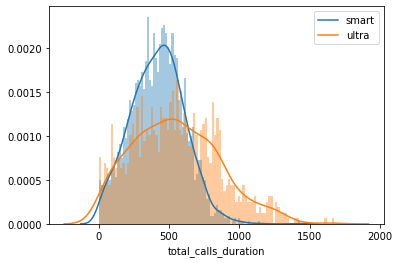

In [73]:
sns.distplot(smart_users.query('~total_calls_duration.isna()')['total_calls_duration'], bins = 100, kde_kws = {'label':'smart'});
sns.distplot(ultra_users.query('~total_calls_duration.isna()')['total_calls_duration'], bins = 100, kde_kws = {'label':'ultra'});
plt.show()

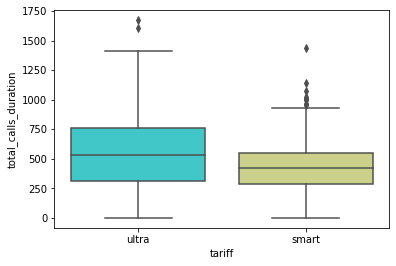

In [40]:
sns.boxplot(x='tariff', y='total_calls_duration', data=users_data, palette='rainbow');
plt.show()

Полученные графики хорошо иллюстрируют выведенные к сравнению величины: по графикам видно, что среднее значение числа израсходованных минут для пользователей тарифа ultra больше, чем среднее значение числа израсходованных минут для пользователей тарифа smart, разброс величины тарифа для ultra так же превосходит разброс величины для тарифа smart, т.е распределение величины израсходованных минут для тарифа smart является более однородным. Однако стоит отметить, что распределение для тарифа smart содержит в себе большее число выборосов.

Абсолютное большинство пользователей тарифа "ultra" укладываются в предоплаченный пакет, чего нельзя сказать о пользователях тарифа "smart", среди которых в предоплаченный пакет минут укладывается чуть более 50%. 

Рассчитаем среднее значение, дисперсию и стандартное отклонение для использованного объема трафика в месяц пользователями каждого из тарифов:

In [63]:
print('Среднее значение потраченного в месяц трафика для пользователей тарифа "smart"',
      smart_users['mb_used'].mean())
print('Среднее значение потраченного в месяц трафика для пользователей тарифа "ultra"',
      ultra_users['mb_used'].mean())

Среднее значение потраченного в месяц трафика для пользователей тарифа "smart" 16243.763358778626
Среднее значение потраченного в месяц трафика для пользователей тарифа "ultra" 19706.979466119097


In [64]:
print('Дисперсия потраченного в месяц трафика для пользователей тарифа "smart"',
      np.var(smart_users['mb_used']))
print('Дисперсия потраченного в месяц трафика для пользователей тарифа "utra"',
      np.var(ultra_users['mb_used']))

Дисперсия потраченного в месяц траффика для пользователей тарифа "smart" 34324671.66515046
Дисперсия потраченного в месяц траффика для пользователей тарифа "utra" 98645116.49033812


In [65]:
print('Стандартное отклонение потраченного в месяц трафика для пользователей тарифа "smart"', 
             np.std(smart_users['mb_used']))
print('Стандартное отклонение потраченного в месяц трафика для пользователей тарифа "ultra"', 
             np.std(ultra_users['mb_used']))

Стандартное отклонение потраченного в месяц трафика для пользователей тарифа "smart" 5858.726112829517
Стандартное отклонение потраченного в месяц трафика для пользователей тарифа "ultra" 9932.024793079108


Построим график распределения вероятности и гистограмму распределения для объема потраченного трафика в месяц по тарифам, а так же boxplot для данных распределений:

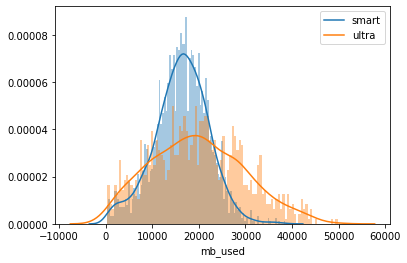

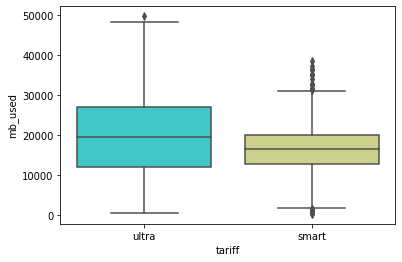

In [66]:
sns.distplot(smart_users.query('~mb_used.isna()')['mb_used'], bins = 100, kde_kws = {'label':'smart'});
sns.distplot(ultra_users.query('~mb_used.isna()')['mb_used'], bins = 100, kde_kws = {'label':'ultra'});
plt.show();
sns.boxplot(x='tariff', y='mb_used', data=users_data.query('~mb_used.isna()'), palette='rainbow');
plt.show();

Опять же, среди пользователей тарифа "ultra" существует большой разброс в потреблении трафика, тогда как пользователи тарифа "smart" расходуют его более однородно. При этом пользователи "ultra" в среднем потребляют больше, чем пользователи "smart". Стоит отметить, что в предоплаченный пакет трафика укладываются около 80% пользователей тарифа "ultra" и менее 50% пользователей тарифа "smart".

Рассчитаем среднее значение, дисперсию и стандартное отклонение для количества отправленных смс-сообщений в месяц пользователями каждого из тарифов:

In [68]:
print('Среднее значение количества отправленных смс в месяц для пользователей тарифа "smart"',
      smart_users['number_of_messages'].mean())
print('Среднее значение количества отправленных смс в месяц для пользователей тарифа "ultra"',
      ultra_users['number_of_messages'].mean())

Среднее значение количества отправленных смс в месяц для пользователей тарифа "smart" 38.71644120707596
Среднее значение количества отправленных смс в месяц для пользователей тарифа "ultra" 61.161006289308176


In [70]:
print('Дисперсия количества отправленных смс в месяц для пользователей тарифа "smart"',
      np.var(smart_users['number_of_messages']))
print('Дисперсия количества отправленных смс для пользователей тарифа "utra"',
      np.var(ultra_users['number_of_messages']))

Дисперсия количества отправленных смс в месяц для пользователей тарифа "smart" 717.220843110227
Дисперсия количества отправленных смс для пользователей тарифа "utra" 2107.0055235156838


In [72]:
print('Стандартное отклонение количества отправленных смс в месяц для пользователей тарифа "smart"', 
             np.std(smart_users['number_of_messages']))
print('Стандартное отклонение количества отправленных смс в месяц для пользователей тарифа "ultra"', 
             np.std(ultra_users['number_of_messages']))

Стандартное отклонение количества отправленных смс в месяц для пользователей тарифа "smart" 26.780979129042816
Стандартное отклонение количества отправленных смс в месяц для пользователей тарифа "ultra" 45.90212983637779


Построим график распределения вероятности и гистограмму распределения для количества отправленных сообщений в месяц по тарифам, а так же boxplot для данных распределений:

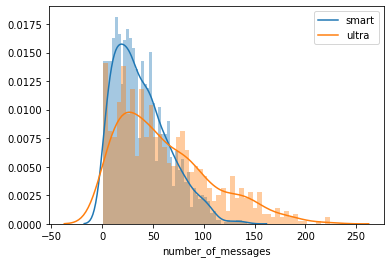

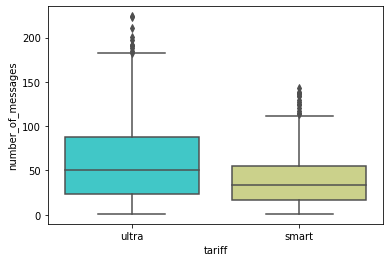

In [21]:
sns.distplot(smart_users.query('~number_of_messages.isna()')['number_of_messages'], bins = 50, kde_kws = {'label':'smart'});
sns.distplot(ultra_users.query('~number_of_messages.isna()')['number_of_messages'], bins = 50, kde_kws = {'label':'ultra'});
plt.show()
sns.boxplot(x="tariff", y="number_of_messages", data=users_data, palette='rainbow');
plt.show()

Судя по распределениям, можно сделать вывод, что смс-сообщения являются наименее востребованным товаром, среди всех рассматриваемых. В предоплаченные пакеты укладывается абсолютное большинство пользователей тарифа "ultra", и около 70% пользователей тарифа "smart". Опять же больший разброс имеет распределение для тарифа "ultra", к тому же для для данного тарифа обнаруживается наибольшее количество выбросов относительно распределений для минут и трафика.

## <a id="link4"> Проверка гипотез </a>

Первой гипотезой которую необходимо проверить в рамках работы является следующая гипотеза:

"Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается"

Для проверки данной гипотезы сформируем нулевую гипотезу H0, за которую примем, то, что средняя выручка пользователей тафира "Ультра" равна средней выручке пользователей тарифа "Смарт", тогда альтернативной гипотезой H1 будет гипотеза, о том, что средняя выручка различна.

Для проверки гипотезы будет использовать общепринятый уровень значимости в размере 5%

In [59]:
alpha = 0.05

results = st.ttest_ind(smart_users['total_fee'], ultra_users['total_fee'], equal_var = False)

if results.pvalue < alpha:
    print('Гипотеза H0 отвергается, p-value = ',results.pvalue)
else: 
    print('Гипотеза H0 не отвергается, p-value = ', results.pvalue)

Гипотеза H0 отвергается, pvalue =  2.7240946993530856e-246


Как видно, значение pvalue получилось крайне малым, что не позволяет нам принять нулевую гипотезу, а значит, позволяет принять альтернативную.
Получается, средние выручки пользователей тарифов различны. Посмотрим на это наглядно:

In [47]:
print('Средняя выручка пользователей тарифа Смарт', smart_users['total_fee'].mean())

Средняя выручка пользователей тарифа Смарт 1294.6393001345896


In [48]:
print('Средняя выручка пользователей тарифа Ультра', ultra_users['total_fee'].mean())

Средняя выручка пользователей тарифа Ультра 2071.0659898477156


Выручка пользователей тарифа "Ультра" на 60% больше выручки пользователей тарифа "Смарт".

Следуюшей гипотезой для проверки явялется гипотеза:

"Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"

В качестве нулевой гипотезы H0 сформирует гипотезу о том, что средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов, тогда альтернативной гипотезой H1 примем то, что эти выручки различаются. При проверке будем использовать прежний уровень значимости 5%.

Предварительно подготовим данные, сделав срезы по пользователям из Москвы и из регионов:

In [25]:
moscow_users = users_data.query('city == "Москва"')

In [26]:
other_users = users_data.query('city != "Москва"')

Для проверки гипотезы о равенстве средних двух генеральных совокупностей будет использовать метод ttest_ind из бибилиотеки scipy.stat:

In [60]:
results = st.ttest_ind(moscow_users['total_fee'], other_users['total_fee'], equal_var = True)

if results.pvalue < alpha:
    print('Гипотеза H0 отвергается, p-value = ',results.pvalue)
else: 
    print('Гипотеза H0 не отвергается, p-value = ', results.pvalue)

Гипотеза H0 не отвергается pvalue =  0.531666503831252


Таким образом, наша нулевая гипотеза о том, что средние выручки пользователей из Москвы и регионов равные между собой не отвергается, значит, гипотеза H1 об их различии должна быть отвергнута. Выведем на экран средние выручки по пользоватеям из Москвы и регионов: 

In [57]:
print('Средняя выручка пользователей из Москвы', moscow_users['total_fee'].mean())

Средняя выручка пользователей из Москвы 1550.8052373158755


In [58]:
print('Средняя выручка пользователей из регионов', other_users['total_fee'].mean())

Средняя выручка пользователей из регионов 1528.3169419900116


Действительно, значения средней выручки пользователей из Москвы и регионов довольно близки друг к другу. 

## <a id="link5"> Вывод </a>

В ходе работы были изучены и подготовлены к дальнешей обработке исходные данные. 
Для каждого пользователя по месяцам было рассчитано количество выполненых звонков и их суммарная продолжительность, количество израсходанного по месяцам трафика, количество отправленных по месяцам сообщений, а так же выручка, полученная мобильным оператором по месяцам с каждого пользователя.

Рассчитанные величины были сгруппированы по тарифам, после этого данные распределения были описаны посредствам среднего, дисперсии, стандартного отклонения, а так же с помощью графиков.

Последним пунктом были проверены 2 гипотезы: 

Гипотеза "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается" - была принята

Гипотеза "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов" - была отвергнута

